### 8CH experiments with SSH

In [114]:
import numpy as np                                                                                                                                                                                  
import xarray as xr                                                                                                                                                                                 
import os                                                                                                                                                                                           
import matplotlib.pyplot as plt                                                                                                                                                                     
import matplotlib.cm as cm    
import matplotlib.pyplot as plt
import numpy as np                                                                                                                                                                                  
%matplotlib inline
import pandas as pd
import seaborn as sns
sns.reset_defaults()
sns.set_context("talk", font_scale=0.8)
import warnings
warnings.filterwarnings('ignore')
from myfuncts2  import *
import myfuncts 
%load_ext autoreload
%autoreload 2
from scipy.ndimage import gaussian_filter1d
                                                                                                                                                                                                    
  

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Train with more channels in ssh/sst (4-4c) layer (4-convs) 

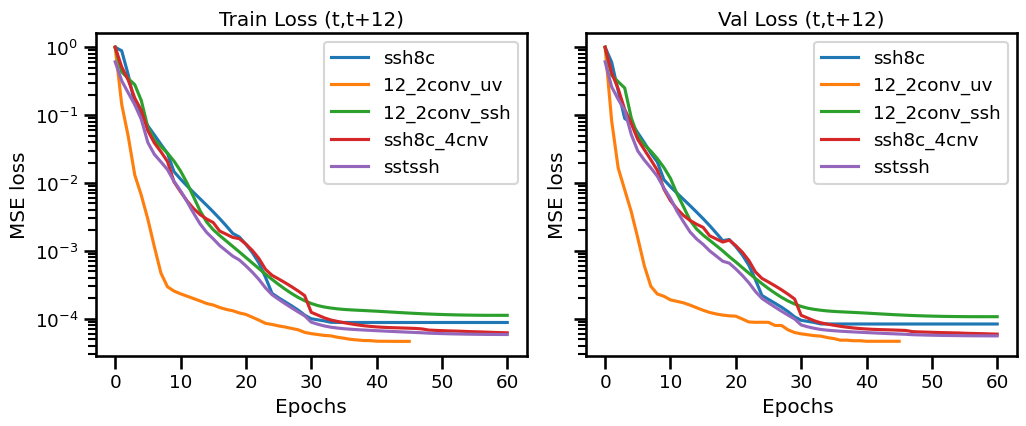

sstssh / 12_2conv_uv = 1.261629123188203
ssh8c_4cnv / 12_2conv_uv = 1.3367132954569787


In [125]:

sims=myfuncts.load_tst8a()


plt.rcParams["figure.figsize"] = [10.50, 4.50]
norm =1# 0.43405532837#sims[0].tloss.values[0]
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
for sim in sims:
        ax1.plot((sim.tloss/norm),label=sim.name)
        ax2.plot((sim.vloss/norm),label=sim.name)

ax1.title.set_text('Train Loss (t,t+12)')
ax1.set_ylabel('MSE loss')
ax1.set_xlabel('Epochs')
ax1.legend()
ax1.set_yscale('log')


ax2.title.set_text('Val Loss (t,t+12)')
ax2.set_ylabel('MSE loss')
ax2.set_xlabel('Epochs ')

ax2.legend()



plt.tight_layout()
plt.show()
print(sims[4].name, '/', sims[1].name, '=', sims[4].tloss[-1]/sims[1].tloss[-1])
print(sims[3].name, '/', sims[1].name, '=', sims[3].tloss[-1]/sims[1].tloss[-1])

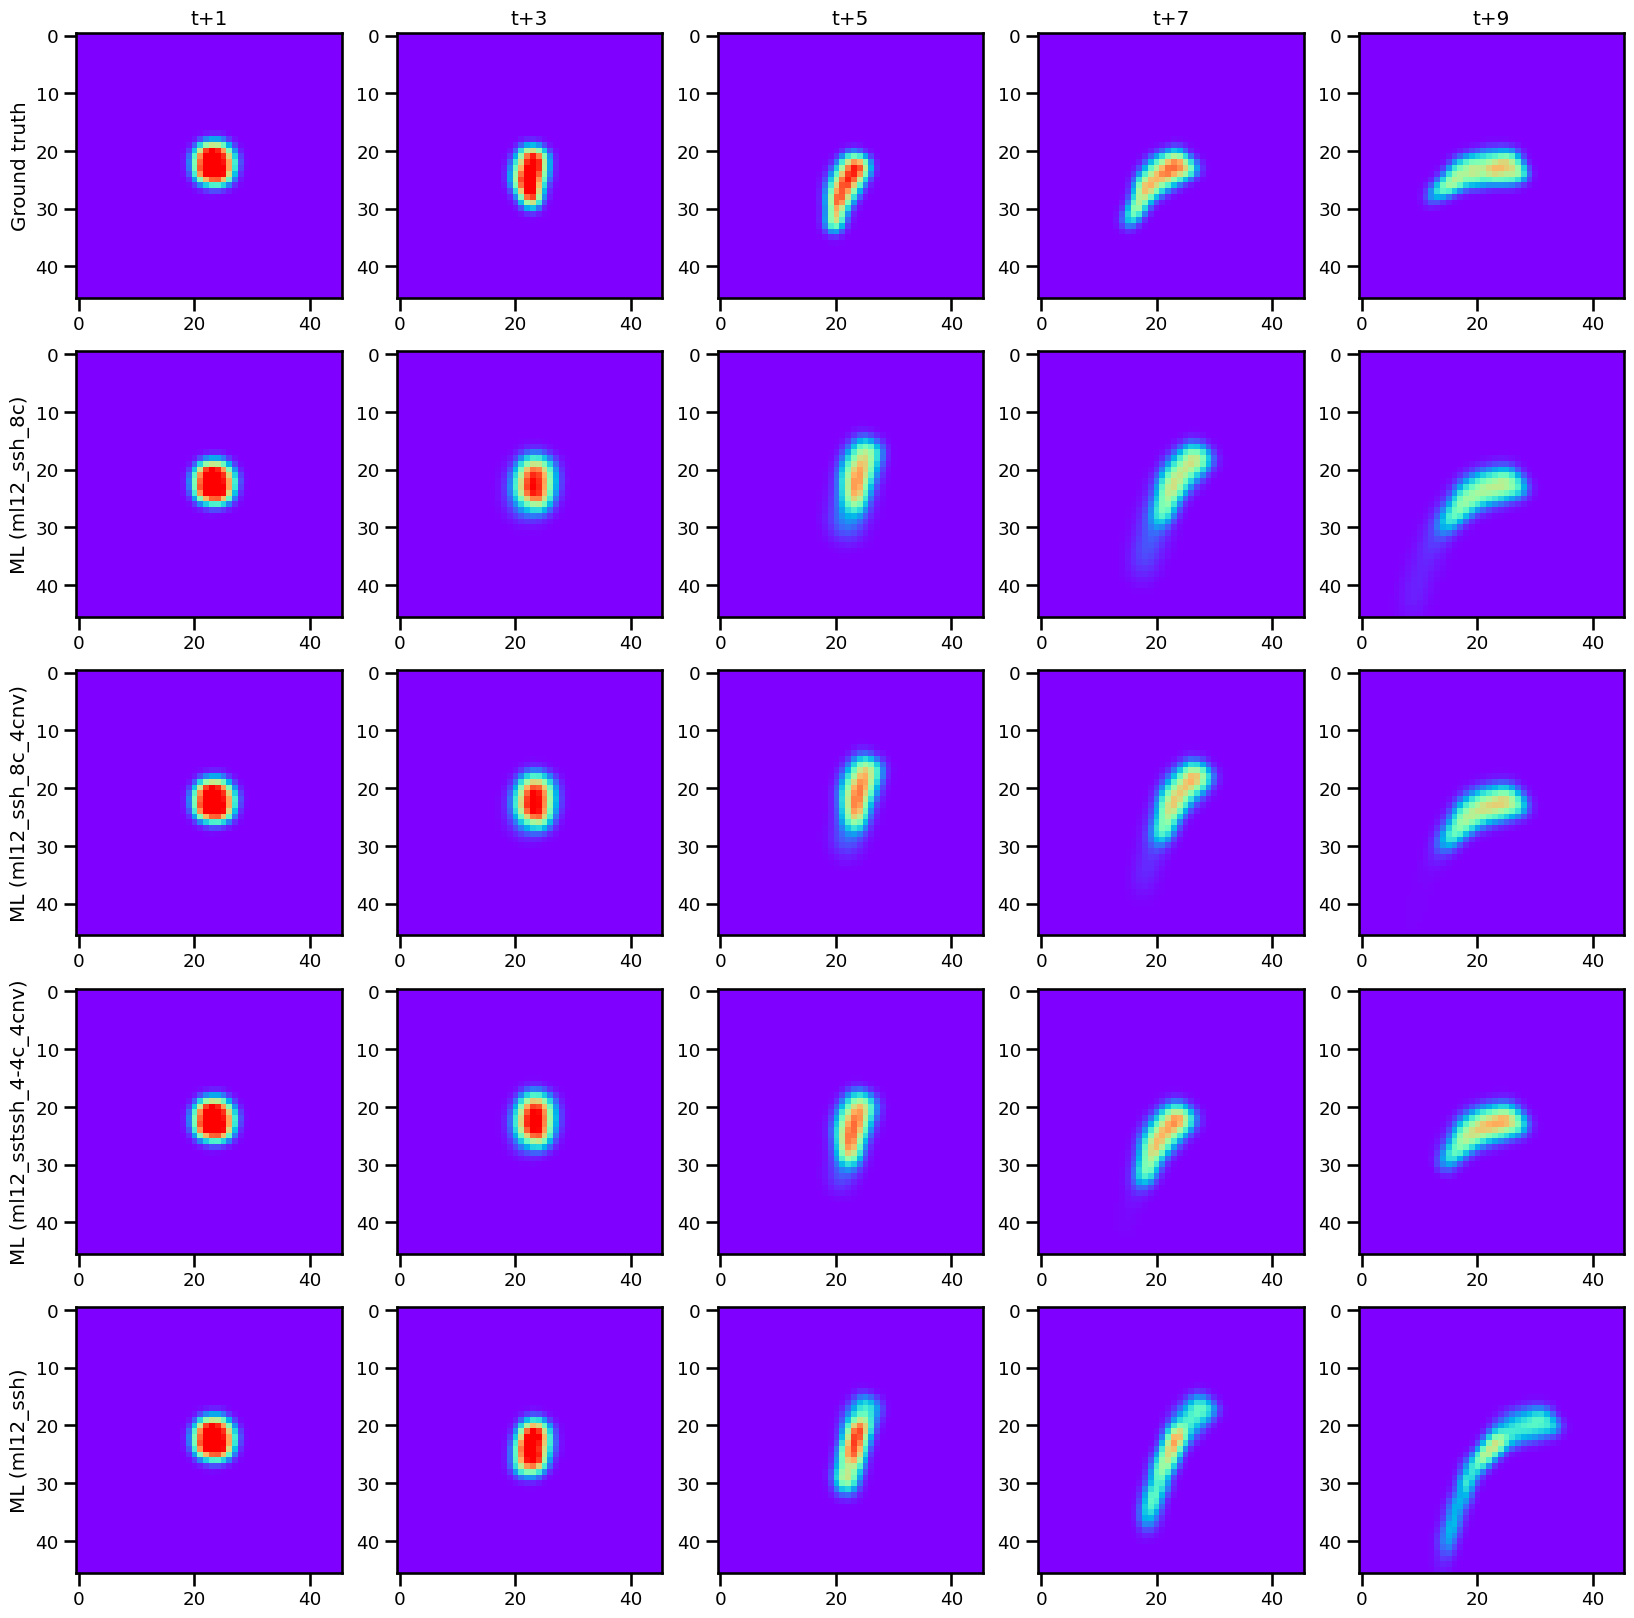

In [136]:


gt, ssh_8c, ssh, ssh_8c2, sstssh  =myfuncts.load_tst8b()

l=0
k=23

fig, axs = plt.subplots(ncols=5, nrows=5, figsize=(20,20))
axs.shape

vm=0.85
k=23

for j in range(5):
    i=2*j
    ind1 = np.unravel_index(np.argmax(gt[i], axis=None), gt[i].shape)
    ind2 = np.unravel_index(np.argmax(ssh[i], axis=None), ssh[i].shape)
    ind3 = np.unravel_index(np.argmax(ssh_8c[i], axis=None), ssh[i].shape)
    ind4 = np.unravel_index(np.argmax(sstssh[i], axis=None), ssh[i].shape)
    axs[0,j].imshow(gt[i,ind1[0]-k:ind1[0]+k,ind1[1]-k:ind1[1]+k],cmap=cm.rainbow, vmin=0, vmax=vm)
    axs[1,j].imshow(ssh_8c[i,ind3[0]-k:ind3[0]+k,ind3[1]-k:ind3[1]+k],cmap=cm.rainbow, vmin=0, vmax=vm)
    axs[2,j].imshow(ssh_8c2[i,ind3[0]-k:ind3[0]+k,ind3[1]-k:ind3[1]+k],cmap=cm.rainbow, vmin=0, vmax=vm)
    axs[3,j].imshow(sstssh[i,ind4[0]-k:ind4[0]+k,ind4[1]-k:ind4[1]+k],cmap=cm.rainbow, vmin=0, vmax=vm)
    axs[4,j].imshow(ssh[i,ind2[0]-k:ind2[0]+k,ind2[1]-k:ind2[1]+k],cmap=cm.rainbow, vmin=0, vmax=vm)
    axs[0,j].title.set_text('t+' + str(i+1))

axs[0,0].set_ylabel('Ground truth')
axs[1,0].set_ylabel('ML (ml12_ssh_8c)')
axs[2,0].set_ylabel('ML (ml12_ssh_8c_4cnv)')
axs[3,0].set_ylabel('ML (ml12_sstssh_4-4c_4cnv)')
axs[4,0].set_ylabel('ML (ml12_ssh)')
plt.show()

In [134]:
ssh8c_=np.zeros(12)
ssh8c2_=np.zeros(12)
gt_=np.zeros(12)
sstssh_=np.zeros(12)
for j in range(0,12):
    i=j
    ind1 = np.unravel_index(np.argmax(gt[i], axis=None), gt[i].shape)
    ind2 = np.unravel_index(np.argmax(ssh_8c[i], axis=None), ssh[i].shape)
    ind3 = np.unravel_index(np.argmax(ssh_8c2[i], axis=None), ssh[i].shape)
    ind4 = np.unravel_index(np.argmax(sstssh[i], axis=None), ssh[i].shape)
    ssh8c_[i]= round(ssh_8c[i,ind2[0]-k:ind2[0]+k,ind2[1]-k:ind2[1]+k].sum(),2)
    ssh8c2_[i]= round(ssh_8c2[i,ind3[0]-k:ind3[0]+k,ind3[1]-k:ind3[1]+k].sum(),2)
    gt_[i]= round(gt[i,ind1[0]-k:ind1[0]+k,ind1[1]-k:ind1[1]+k].sum(),2)
    sstssh_[i]= round(sstssh[i,ind4[0]-k:ind4[0]+k,ind4[1]-k:ind4[1]+k].sum(),2)
    


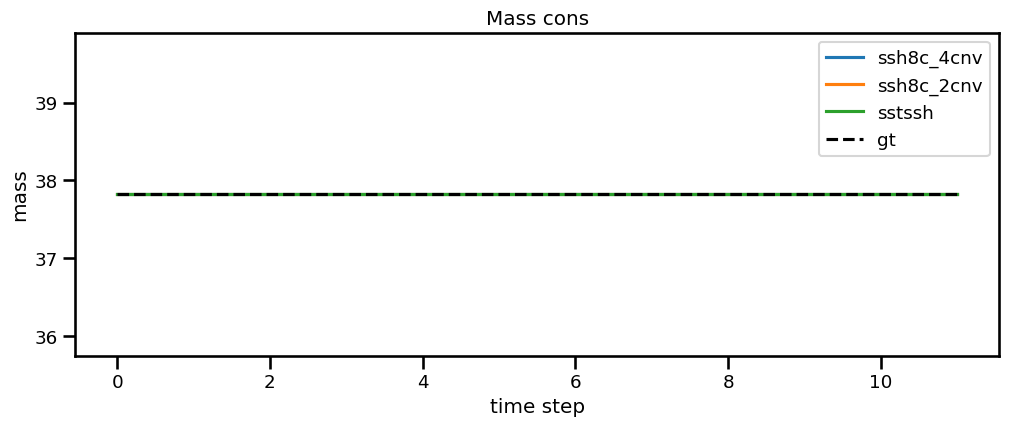

In [135]:

sims=myfuncts.load_tst7a()


plt.rcParams["figure.figsize"] = [10.50, 4.50]
norm = 0.43405532837#sims[0].tloss.values[0]
f, (ax1) = plt.subplots(1, sharey=True)

ax1.plot(ssh8c2_,label='ssh8c_4cnv')
ax1.plot(ssh8c_,label='ssh8c_2cnv')
ax1.plot(sstssh_,label='sstssh')
ax1.plot(gt_, 'k--',label='gt')

ax1.title.set_text('Mass cons')
ax1.set_ylabel('mass')
ax1.set_xlabel('time step')
ax1.legend()


plt.tight_layout()
plt.show()
